# Midterm Project (Team #1) Kaylee Auguillard, Andrew Badzioch,

1. Team Members: Kaylee Auguillard, Andrew Badzioch, 
2. Step(s) and the member who completes the step(s).

## Step 1: Introduction 
- Context 
     - In this project, you will make a comparison between Adidas and Nike sneakers products.
- Objectives
     - Data and opinion mining from the dataset and answering mining questions.
- Data Description 
- Dataset: sneakers.csv
    - Product Name: Name of the product
    - Product ID: ID of the product
    - Listing Price: Listed price of the product
    - Sale Price: Sale price of the product
    - Discount: Percentage of discount on the product
    - Brand: Brand of the product
    - Rating: Rating of the product
    - Reviews: Number of reviews for the product


## Step 2: Importing Libraries
- Import all needed libraries for this project

In [1]:
#general libraries
import numpy as np
import pandas as pd
import math

#data visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

## Step 3: Loading the Dataset

In [2]:
df = pd.read_csv('sneakers.csv')

In [3]:
#make a copy of the dataset
sneakers = df.copy()

In [4]:
#making sure the dataset has been loaded
sneakers.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39


# Step 4: EDA

### A) Basic Data Exploration

In [5]:
sneakers.shape

(3268, 8)

In [6]:
sneakers.size

26144

In [7]:
sneakers.ndim

2

In [8]:
sneakers.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [9]:
sneakers.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [10]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [11]:
sneakers.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [12]:
sneakers.describe(include = 'object')

,Product Name,Product ID,Brand
count,3268,3268,3268
unique,1531,3179,5
top,Women's adidas Originals Sambarose Shoes,CD6720-808,Adidas CORE / NEO
freq,16,3,1111


In [13]:
sneakers.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [14]:
# Find and display all duplicated rows in the sneakers dataset
duplicate_rows = sneakers[sneakers.duplicated()].count()
print(duplicate_rows)

Product Name     88
Product ID       88
Listing Price    88
Sale Price       88
Discount         88
Brand            88
Rating           88
Reviews          88
dtype: int64


In [15]:
sneakers.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
sneakers[sneakers.duplicated()].count()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

### B) Univariate, Bivariate, Multivariate Analyses

#### Univariate Visualization

### C) Visualization
- For this section, you will create graphs including the correlation heatmap and the pairplot.
    - Correlation Heatmap (Andrew)

**Heatmap**

In [17]:
sneakers.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [18]:
numb_col = sneakers[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]
numb_col.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,14999,7499,50,4.8,41
1,7599,3799,50,3.3,24
2,999,599,40,2.6,37
3,6999,3499,50,4.1,35
4,7999,3999,50,3.5,72


In [19]:
numb_col.corr()

,Listing Price,Sale Price,Discount,Rating,Reviews
Listing Price,1.000000,0.365871,0.098878,0.083587,0.137744
Sale Price,0.365871,1.000000,-0.598524,-0.043417,-0.228735
Discount,0.098878,-0.598524,1.000000,0.064803,0.287762
Rating,0.083587,-0.043417,0.064803,1.000000,0.122349
Reviews,0.137744,-0.228735,0.287762,0.122349,1.000000


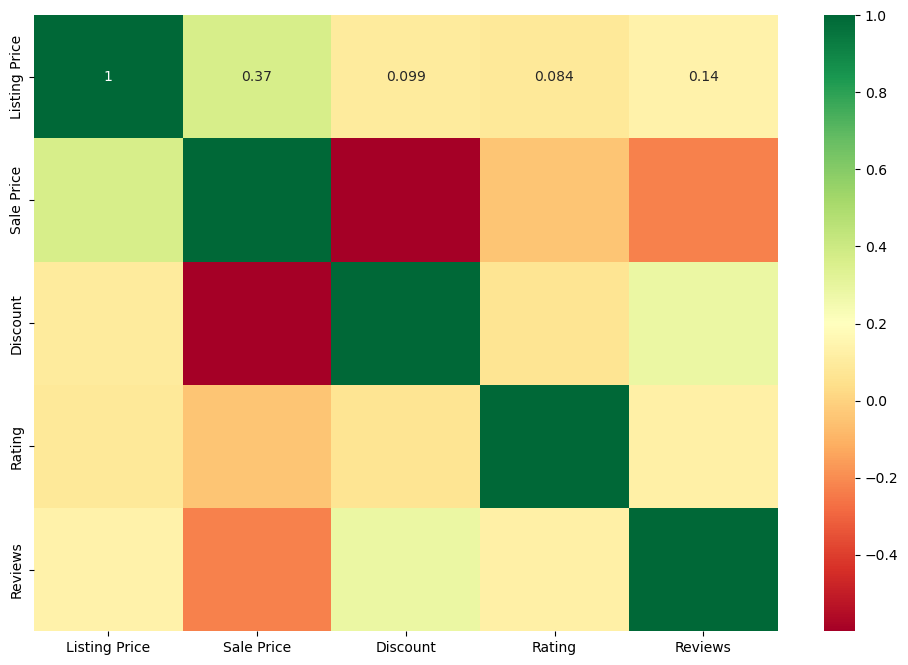

In [20]:
# setting the plot size
plt.figure(figsize=(12, 8))

# creating the heatmap and color coding
sns.heatmap(numb_col.corr(), cmap='RdYlGn', annot=True);

### D) EDA Summary

# Step 5: Answering the Mining Questions

- **Answer all questions here (after each question).**

- **Kaylee**
1. What is the shape of the dataset? The Shape of the dataset is (3268, 8).
2. Are there any missing values in this dataset? There are **no** missing values in this dataset.
3. List all 8 columns' dtypes.
     - Product Name -- object
     - Product ID -- object
     - Listing Price -- int64
     - Sale Price -- int64
     - Discount -- int64
     - Brand -- object
     - Rating -- float64
     - Reviews -- int64
4. Are there any duplicated rows (observations) in this dataset? There are 88 rows of duplicates in this dataset.
5. Refer to the statistical summary of the dataset and answer the following:
     - The average listing price: 6868
     - The average sale price: 6134.2
     - The average discount: 22.6
     - The average rating: 3.2
     - The average number of reviews: 40.5

- **Tales**
6. Which "Brand" has the highest number of products in this dataset?
7. As you can see, the "Listing Price" for some products is zero (0). How many products with zero listing price are there in this dataset?
8. Perform the "Univariate EDA", and examine any type of skewness (outliers) for all the variables.
9. The the percentage for the following:
     - Products with listing prices less than 15000
     - Products with sale price less than 15000
     - Products with at least 50% discount
     - Products with rating less than 3.5
     - Products with review numbers less than 100
     - The 3 highest percentages of the discount graph

- **Andrew**
10. Perform the "Bivariate EDA", and examine the following:
     - The two highly positively correlated variables:
     - The two highly negatively correlated variables: <code>'Discount' and 'Sale Price'</code>
11. What are the names of the 10 highest rated products?
12. What are the 10 products' names with the highest number of reviews?
13. Which company gives more discount: Adidas or Nike?

# Step 6: Conclusion 
- For the conclusion, please provide 10 insights gained from completing this project.